In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style(theme='grade3', context='notebook', ticks=True, grid=False)

In [2]:
sites_general = pd.read_excel('sitios_general_ecuador.xlsx')
sites_integracion = pd.read_excel('sitios_integracion_ecuador.xlsx')
authors_general = pd.read_excel('autores_general_ecuador.xlsx')
authors_integracion = pd.read_excel('autores_integracion_ecuador.xlsx')

In [3]:
base_sitios = pd.merge(sites_general,sites_integracion, left_on='Author', right_on='Author', how = 'left')
base_cuentas = pd.merge(authors_general,authors_integracion, left_on='Author', right_on='Author', how = 'left')

In [4]:
base_pegada = base_cuentas.append(base_sitios)
base_pegada['Integración'] = base_pegada['Integración'].fillna(0)
base_pegada.head(7)

,Author,Volumen,Integración
0,ecuabot,412,28.0
1,paoleague,227,3.0
2,ecupuntocom,185,3.0
3,gkecuador,113,14.0
4,moviliderec,86,6.0
5,diarioextraec,74,4.0
6,eluniversocom,59,3.0


In [5]:
base_pegada['% Integración'] = round(base_pegada['Integración']/base_pegada['Volumen']*100,2)
base_pegada.head(7)

,Author,Volumen,Integración,% Integración
0,ecuabot,412,28.0,6.80
1,paoleague,227,3.0,1.32
2,ecupuntocom,185,3.0,1.62
3,gkecuador,113,14.0,12.39
4,moviliderec,86,6.0,6.98
5,diarioextraec,74,4.0,5.41
6,eluniversocom,59,3.0,5.08


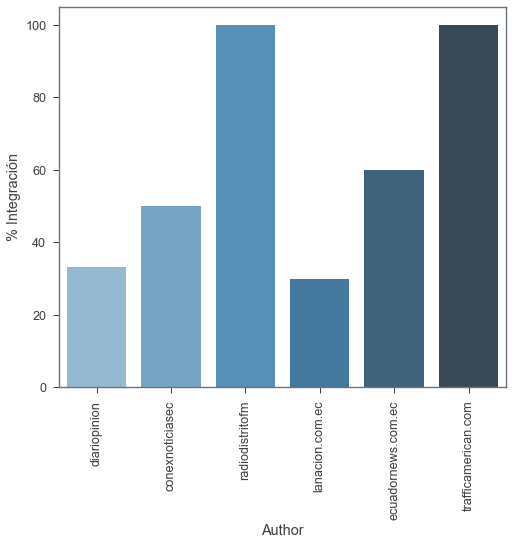

In [6]:
base_grafica = base_pegada[base_pegada['% Integración'] > 25.0]
ax = sns.barplot(x="Author", y="% Integración", data=base_grafica, palette='Blues_d')
for item in ax.get_xticklabels():
    item.set_rotation(90)

In [7]:
base_pegada.to_excel('Base_medios_sitios_integracion.xlsx')

In [8]:
base_grafica = base_grafica.sort_values('Integración', ascending=False)
base_grafica

,Author,Volumen,Integración,% Integración
1,lanacion.com.ec,60,18.0,30.00
13,ecuadornews.com.ec,5,3.0,60.00
84,diariopinion,3,1.0,33.33
102,conexnoticiasec,2,1.0,50.00
126,radiodistritofm,1,1.0,100.00
17,trafficamerican.com,1,1.0,100.00


In [9]:
base_grafica = base_grafica.sort_values('% Integración', ascending=True)
base_grafica

,Author,Volumen,Integración,% Integración
1,lanacion.com.ec,60,18.0,30.00
84,diariopinion,3,1.0,33.33
102,conexnoticiasec,2,1.0,50.00
13,ecuadornews.com.ec,5,3.0,60.00
126,radiodistritofm,1,1.0,100.00
17,trafficamerican.com,1,1.0,100.00


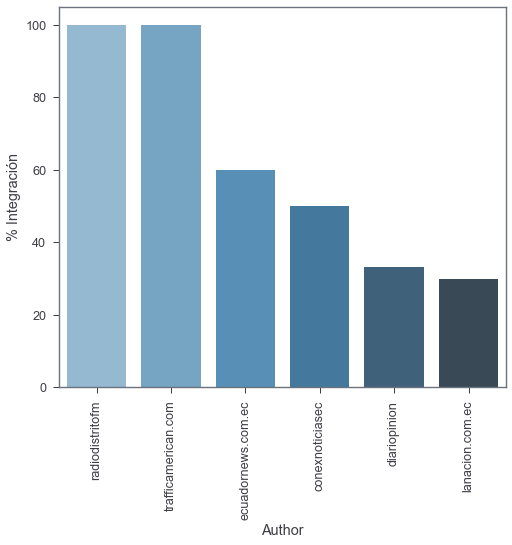

In [10]:
base_grafica = base_pegada[base_pegada['% Integración'] > 28.57]
ax = sns.barplot(x="Author", y="% Integración", data=base_grafica, palette='Blues_d', order = base_grafica.sort_values('% Integración', ascending=False).Author)
for item in ax.get_xticklabels():
    item.set_rotation(90)

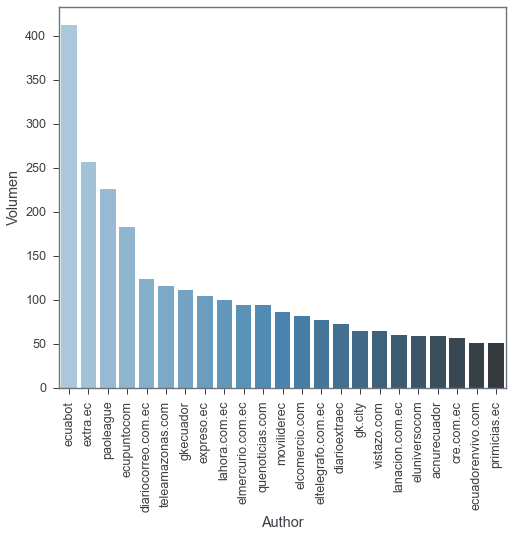

In [11]:
base_grafica = base_pegada[base_pegada['Volumen'] > 45]
ax = sns.barplot(x="Author", y="Volumen", data=base_grafica, palette='Blues_d', order = base_grafica.sort_values('Volumen', ascending=False).Author)
for item in ax.get_xticklabels():
    item.set_rotation(90)

In [13]:
import funciones as fn
df = pd.read_excel('mentions.xlsx')
df

,Unnamed: 0,Query Id,Query Name,Date,Title,Snippet,Url,Domain,Sentiment,Emotion,...,Reddit Score,Reddit Author Karma,Reddit Author Awardee Karma,Reddit Author Awarder Karma,Subreddit,Subreddit Subscribers,Barómetro Ecuador,Boletín,Ciudades,Medios
0,1,2000697378,General,2022-01-11 04:18:16.000,"RT @BNPeriodismo El informe del caso Saab, que...","RT @BNPeriodismo El informe del caso Saab, que...",http://twitter.com/MoviLIDERec/statuses/148075...,twitter.com,neutral,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Quito,"Medios, medios all"
1,2,2000697378,General,2022-01-11 03:50:03.000,RT @Elperiodiquito #Mundo #Ecuador anunciará e...,RT @Elperiodiquito #Mundo #Ecuador anunciará e...,http://twitter.com/ecuabot/statuses/1480748815...,twitter.com,neutral,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Medios, medios all"
2,3,2000697378,General,2022-01-11 03:23:33.000,RT @paoleague URGENTE\nCubanos y venezolanos d...,RT @paoleague URGENTE Cubanos y venezolanos de...,http://twitter.com/paoleague/statuses/14807421...,twitter.com,neutral,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Vivienda,NaN,Quito,"Medios, medios all"
3,4,2000697378,General,2022-01-11 01:55:14.000,El proceso de entrega de visas humanitarias te...,El proceso de entrega de visas humanitarias te...,http://twitter.com/GKecuador/statuses/14807199...,twitter.com,neutral,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Trabajo,Medios de Comunicación y Organizaciones,Quito,"Medios, medios all"
4,5,2000697378,General,2022-01-11 01:50:02.000,RT @Elperiodiquito #Mundo #Ecuador anunciará e...,RT @Elperiodiquito #Mundo #Ecuador anunciará e...,http://twitter.com/ecuabot/statuses/1480718613...,twitter.com,neutral,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Medios, medios all"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2254,2255,2000697378,General,2021-06-15 19:10:06.000,La Policía aprehende a tres sujetos armados qu...,La Policía aprehende a tres sujetos armados qu...,http://twitter.com/Expresoec/statuses/14048789...,twitter.com,neutral,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Seguridad,Medios de Comunicación y Organizaciones,Guayaquil,"Medios, medios all"
2255,2256,2000697378,General,2021-06-15 17:15:00.000,"📰#Nacionales | El canciller Mauricio Montalvo,...","📰#Nacionales | El canciller Mauricio Montalvo,...",http://twitter.com/pichinchauniver/statuses/14...,twitter.com,neutral,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medios de Comunicación y Organizaciones,Quito,NaN
2256,2257,2000697378,General,2021-06-15 17:06:26.000,Se acerca la Conferencia Internacional de Dona...,Se acerca la Conferencia Internacional de Dona...,http://twitter.com/ACNUREcuador/statuses/14048...,twitter.com,neutral,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Salud,Medios de Comunicación y Organizaciones,NaN,NaN
2257,2258,2000697378,General,2021-06-15 15:20:00.000,"“Eso es lo que yo no quiero, poner a mi hija e...","“Eso es lo que yo no quiero, poner a mi hija e...",http://twitter.com/ACNUREcuador/statuses/14048...,twitter.com,neutral,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Seguridad,Medios de Comunicación y Organizaciones,NaN,NaN


In [14]:
nombres = df['Author'].unique()
nombres

array(['MoviLIDERec', 'ecuabot', 'paoleague', 'GKecuador', 'Expresoec',
       'ecupuntocom', 'larepublica_ec', 'DialoguemosINFO', 'KCH_FM',
       'unpguayas_', 'EcuadorWillana', 'LaPosta_Ecu', 'complicefm',
       'teleamazonasec', 'albo75', 'CanalRTU', 'ecuadorprensaec',
       'UdlaChannelEc', 'EcuavisaInforma', 'WRadioec', 'revistavistazo',
       'eluniversocom', 'IdoloPasionWeb', 'EsmeraldasNews',
       'cronicacuenca', 'DebateBSC', 'ecuafootball', 'elmercuriomanta',
       'WQRadio_EC', 'iamdanielypunto', 'DiarioExtraEc', 'RevistaHogar',
       'ACNUREcuador', 'PrimeraPlanaECU', 'tctelevision', 'notimundoec',
       'RiobambaBot', 'portalxvcom', 'diariocorreoec', 'aldiacomec',
       'elmercurioec', 'TVCElComercioTv', 'ecuadoraldia365',
       'RTS_LaNoticia', 'teleradioec', 'MachalaNoticias', 'Caravana750',
       '3monosapios', 'MundoDeporEC', 'Unionradio580am', 'ecuadorenvivo',
       'MetroEcuador', 'quenoticiasec', 'CCPIDG', 'radioactiva_ec',
       'TiempoRealEC', 'lahis

In [15]:
resultado = pd.DataFrame({"Author":[],
                         "Twitter Followers":[]})
for i in range(len(nombres)):
    basesita = df[df['Author'] == nombres[i]]
    followers = basesita['Twitter Followers'].max()
    localdf = pd.DataFrame({"Author":[nombres[i]],
                         "Twitter Followers":[followers]})
    resultado = resultado.append(localdf)

resultado.reset_index(inplace=True) 
resultado.drop(columns = 'index', inplace = True)
resultado.head()

,Author,Twitter Followers
0,MoviLIDERec,971.0
1,ecuabot,8164.0
2,paoleague,2680.0
3,GKecuador,38917.0
4,Expresoec,893167.0


In [16]:
resultado
resultado.to_excel("Followers_Medios_Ecuador.xlsx")

In [17]:
resultado[resultado['Twitter Followers'] > 100000]

,Author,Twitter Followers
4,Expresoec,893167.0
6,larepublica_ec,145828.0
7,DialoguemosINFO,196274.0
11,LaPosta_Ecu,265157.0
13,teleamazonasec,2383860.0
15,CanalRTU,210450.0
18,EcuavisaInforma,1648866.0
20,revistavistazo,551047.0
21,eluniversocom,2455819.0
30,DiarioExtraEc,239728.0


In [18]:
len(resultado[resultado['Twitter Followers'] > 100000])

28

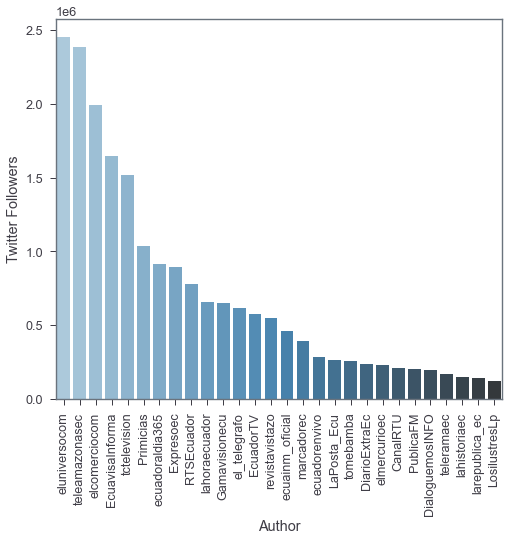

In [19]:
base_grafica = resultado[resultado['Twitter Followers'] > 100000]
ax = sns.barplot(x="Author", y="Twitter Followers", data=base_grafica, palette='Blues_d', order = base_grafica.sort_values('Twitter Followers', ascending=False).Author)
for item in ax.get_xticklabels():
    item.set_rotation(90)